In [1]:
import numpy as np
import mdtraj as md
import matplotlib.pyplot as plt
import nglview as nv

# # # use "python -m pip install pymdna" to install pymdna
# import pymdna as mdna

import sys
sys.path.append('/Users/thor/surfdrive/Projects/pymdna/')
import pymdna as mdna 
%load_ext autoreload
%autoreload 2

In [2]:
traj = md.load('../extend/12bp.pdb')
traj = md.load('/Users/thor/surfdrive/Data/h-ns/BacterialChromatin/FI/0_k/2_ApT/dry_0.xtc',top='/Users/thor/surfdrive/Data/h-ns/BacterialChromatin/FI/0_k/2_ApT/dry_0.pdb')
traj.remove_solvent(inplace=True)
traj = traj.atom_slice(traj.topology.select('not protein'))[0]
dna = mdna.NucleicFrames(traj)
traj, dna

(<mdtraj.Trajectory with 1 frames, 761 atoms, 24 residues, and unitcells at 0x17ad0fc10>,
 <pymdna.geometry.NucleicFrames at 0x179fe4090>)

(12, 1, 4, 3)


(1.2199982444445285,
 6.645748730500539,
 3.5186249057451877,
 8.944375391801199,
 -0.4699687927961351,
 3.5993440717458727)

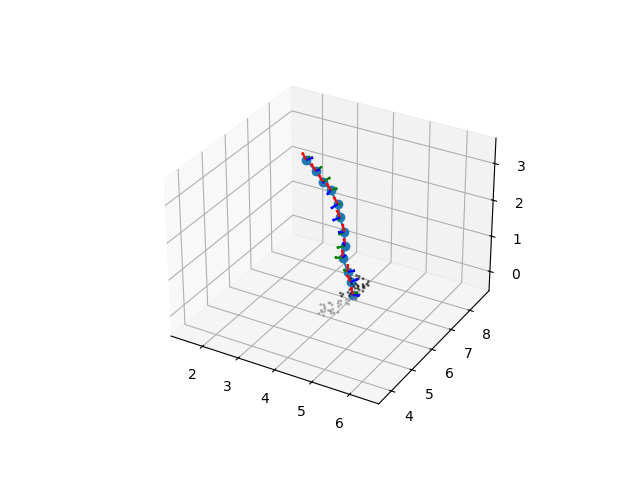

In [3]:
%matplotlib ipympl

xyz = traj.xyz[0]
# We have to reverse to match these frames to the order of bases
frames = dna.mean_reference_frames[::-1]
print(frames.shape)
frames = frames.swapaxes(0,2)

origins = frames[0][0]
tangents = frames[3][0]
normals = frames[2][0]
binormals  = frames[1][0]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(origins[:,0], origins[:,1], origins[:,2],'-o')
ax.quiver(origins[:,0], origins[:,1], origins[:,2], tangents[:,0], tangents[:,1], tangents[:,2], length=0.2,color='r')
ax.quiver(origins[:,0], origins[:,1], origins[:,2], normals[:,0], normals[:,1], normals[:,2], length=0.2,color='g')
ax.quiver(origins[:,0], origins[:,1], origins[:,2], binormals[:,0], binormals[:,1], binormals[:,2], length=0.2,color='b')

subtraj = traj.atom_slice(traj.topology.select('resid 0'))
xyz = subtraj.xyz[0]

ax.scatter(xyz[:,0], xyz[:,1], xyz[:,2], c='k', s=1,alpha=0.5)

subtraj = traj.atom_slice(traj.topology.select('resid 23'))
xyz = subtraj.xyz[0]

ax.scatter(xyz[:,0], xyz[:,1], xyz[:,2], c='gray', s=1,alpha=0.5)
ax.axis('equal')

In [4]:
initial_frame = dna.mean_reference_frames[::-1][-1] # origin, major groove, backbone, tangent vector
initial_frame[0][0]


array([3.17374659, 6.29272652, 3.41437531])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[[ 3.17374659e+00  6.29272652e+00  3.41437531e+00]
 [ 8.52173993e-01  1.00473461e-01  5.13521774e-01]
 [-1.18222845e-01  9.92985247e-01  1.90405077e-03]
 [-5.09728261e-01 -6.23325613e-02  8.58074504e-01]]


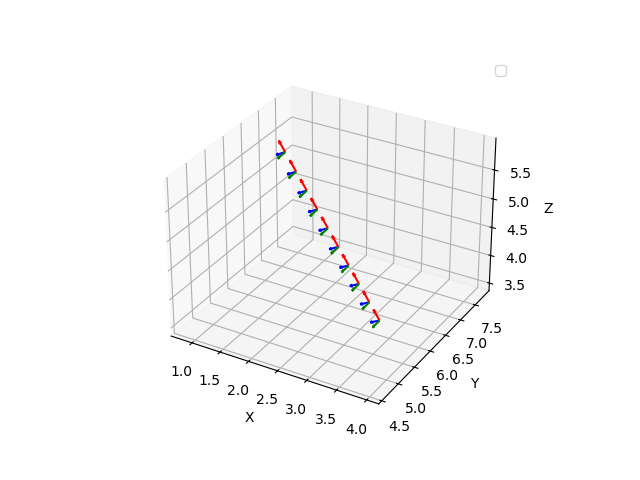

/Users/thor/surfdrive/Projects/pymdna/pymdna/utils.py:54: RuntimeWarning: invalid value encountered in divide
  omega_normalized = np.where(omega_norm != 0, omega / omega_norm, omega)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


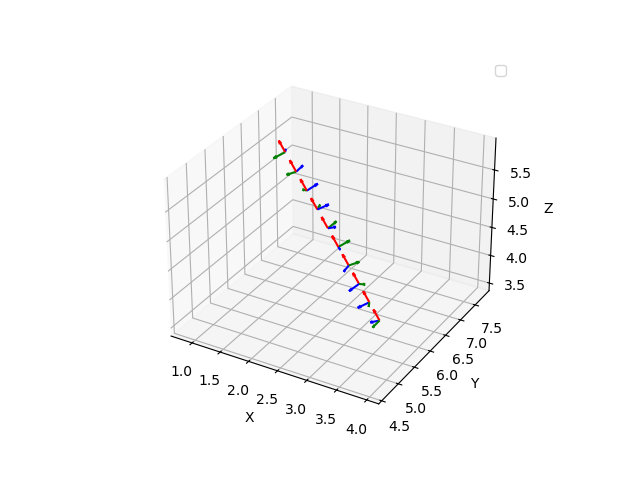

(<Figure size 640x480 with 1 Axes>,
 <Axes3D: xlabel='X', ylabel='Y', zlabel='Z'>)

In [5]:
# Make control points
control_points = mdna.Shapes.line(length=3,num_points=100)

# Use initial frame from last basepair frame of dna
dna = mdna.NucleicFrames(traj)
initial_frame = dna.mean_reference_frames[::-1][-1] # origin, major groove, backbone, tangent vector
print(initial_frame[0])
# Generate spline frames from control points
spline = mdna.SplineFrames(
    initial_frame=initial_frame[0],
    control_points=control_points, 
    frame_spacing=0.34,
    frame_tolerance=0.05,
    degree=3, 
    num_points = 10000,
    closed=False,
    verbose=False)

spline.plot_frames(equal=True)
# spline.twist_frames()
# spline.plot_frames(equal=True)

In [ ]:
# use end of dna as reference/seed for the initial frame of the new spline
# so modifiy SplineFrames to recieve an iniiial frame
# and use it to calculate the new spline
frames = dna.mean_reference_frames
frames.shape

In [ ]:
# Make control points
control_points = mdna.Shapes.line(length=3,num_points=100)

# Generate spline frames from control points
spline = mdna.SplineFrames(
    control_points=control_points, 
    frame_spacing=0.34,
    frame_tolerance=0.05,
    degree=3, 
    num_points = 10000,
    closed=False,
    verbose=False)

spline.frames.shape, spline.plot_frames(equal=True)




In [ ]:
spli

In [ ]:
mdna.utils.get_sequence_letters(traj), mdna.utils.get_base_pair_letters(traj)

In [83]:
xyz = traj.xyz[0]
frames = dna.mean_reference_frames[::-1]
frames = frames.swapaxes(0,2)

# todo:
# sequence to spline, spline to dna already exists


# Goal extend existing DNA either from 5' or 3' end
# dna.extend(spline,sequence,direction) or dna.extend(sequence,direction)
# or mdna.concatenate((dna_0,...,dna_n),direction)
# dna.append(dna,direction) 

# 1. find the end of the DNA
    # we assume the first residue of the chain is the 5' end and the last residue is the 3' end
    # meaning that we create the tangents in the direction of leading chain

# frames is ordered in reverse with respect to the chain direction, so the tangents 
# are pointing towards the 3' end with respect to the leading chain (0th residue)


def extend(dna, sequence, reverse=False):

    """Extend the DNA with the sequence in the specified direction"""
    # If reverse the 3' end is extended, otherwise the 5' end is extended

    # 1. find the end of the DNA
    # we assume the first residue of the chain is the 5' end and the last residue is the 3' end
    # meaning that we create the tangents in the direction of leading chain
    # frames is ordered in reverse with respect to the chain direction, so the tangents 
    # are pointing towards the 3' end with respect to the leading chain (0th residue)


    # get sequence of existing DNA
    sequence_list = mdna.utils.get_sequence_letters(dna.traj)  

    # check if sequence is a string of letters 
    assert type(sequence) == str, "sequence must be a string of letters"
    sequence = [code for code in sequence]
    #new_sequence = sequence_list + sequence if not reverse else sequence + sequence_list
    
    # create the spline
    mdna.SequenceGenerator(sequence_list)



    # frames =  dna.mean_reference_frames[::-1]



    # 2. create the spline
    # 3. create the new DNA
    # 4. concatenate the new DNA with the old DNA
    pass 

extend(dna,'ATATA',reverse=True)

In [ ]:
%matplotlib ipympl

xyz = traj.xyz[0]
frames = dna.mean_reference_frames[::-1][-2:]
print(frames.shape)
frames = frames.swapaxes(0,2)

origins = frames[0][0]
tangents = frames[3][0]
normals = frames[2][0]
binormals  = frames[1][0]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(origins[:,0], origins[:,1], origins[:,2],'-o')
ax.quiver(origins[:,0], origins[:,1], origins[:,2], tangents[:,0], tangents[:,1], tangents[:,2], length=0.2,color='r')
ax.quiver(origins[:,0], origins[:,1], origins[:,2], normals[:,0], normals[:,1], normals[:,2], length=0.2,color='g')
ax.quiver(origins[:,0], origins[:,1], origins[:,2], binormals[:,0], binormals[:,1], binormals[:,2], length=0.2,color='b')

subtraj = traj.atom_slice(traj.topology.select('resid 0'))
xyz = subtraj.xyz[0]

ax.scatter(xyz[:,0], xyz[:,1], xyz[:,2], c='k', s=1,alpha=0.5)

subtraj = traj.atom_slice(traj.topology.select('resid 23'))
xyz = subtraj.xyz[0]

ax.scatter(xyz[:,0], xyz[:,1], xyz[:,2], c='gray', s=1,alpha=0.5)
ax.axis('equal')

In [ ]:
# Goal extend existing DNA either from 5' or 3' end
# dna.extend(spline,sequence,direction) or dna.extend(sequence,direction)
# dna.append(dna,direction) 

# 1. find the end of the DNA
    # we assume the first residue of the chain is the 5' end and the last residue is the 3' end
    # meaning that we create the tangents in the direction of leading chain

# frames is ordered in reverse with respect to the chain direction, so the tangents 
# are pointing towards the 3' end with respect to the leading chain (0th residue)


In [ ]:

phosphate_names = ['P','OP1','OP2']
sugar_names = ["C1\'","C2\'","C3\'","C4\'","C5\'"]

def analyze_chain(traj, chain):
    chain_order = []
    atom_map = {at.index:at for at in traj.top.atoms}
    residues = chain._residues
    phosphate_atoms, sugar_atoms = [], []
    for res in chain._residues:
        for at in res.atoms:
            phos_res, sugar_res = [], []
            if at.name in phosphate_names:
                phos_res.append(at.index)
                chain_order.append('P-')
            elif at.name in sugar_names:
                sugar_res.append(at.index)
                chain_order.append('S-')
        phosphate_atoms.append(phos_res)
        sugar_atoms.append(sugar_res)
    print(''.join(chain_order))
    
for chain in traj.top.chains:
    analyze_chain(traj, chain)
            

In [ ]:
traj.top.create_standard_bonds()
traj.top

In [ ]:
view = nv.show_mdtraj(traj)
view.version

In [ ]:
params, names = dna.get_paramters()
# params.shape, names

# Confidence intervals 
from scipy.stats import t

fig, ax = plt.subplots(1,2,figsize=[6,3])
fig.tight_layout()

M = np.mean(params, axis=0)
S = np.std(params, axis=0)
n = params.shape[0]
ci = t.ppf(0.975, df=n-1) * S / np.sqrt(n)
    
c = 0
for _, i in enumerate(M.T):
    if _ >= 6:
        c1, c2 = 'red','coral'
    else:
        c1, c2 = 'blue','cornflowerblue'
    if names[_] == 'twist' or names[_] == 'rise':
        ax[c].plot(i[::-1], '-o',color=c1)
        ax[c].set_title(names[_])
        c+=1    

# ref =  [33.32,45.57,23.11,39.37,35.51,30.47,34.64,41.84,25.6,45.29,31.66,0][::-1]
# ref = [36.78,44.45,22.79,39.99,35.34,29.75,33.53,44.32,25.11,45.74,31.21,0][::-1]
# ref_ = [3.17,3.31,3.33,3.81,3.22,3.46,2.78,3.52,3.32,3.18,3.46,0][::-1]


#ax[1].plot(ref, '-o',color='k',label='ref')
#ax[0].plot(ref_, '-o',color='gray',label='ref_')

In [ ]:
residues_A = dna.top._chains[0]._residues
residues_B = dna.top._chains[1]._residues
dna.frames